In [1]:
import pandas as ad
import os 
import numpy as np
import SimpleITK as sitk
import matplotlib.pyplot as plt


In [2]:
def get_2ddataset(paths):
    
    df = ad.read_csv("D:/fin_de_etude/data/annotations.csv")
    j = 1
    for path in paths:
        for  file in os.listdir(path):
            if file.endswith(".mhd"):
                if file[:-4] in df["seriesuid"].tolist():
                    image = sitk.ReadImage(os.path.join(path, file))
                    
                    df_2 = df[df["seriesuid"] == file[:-4]]
                    i = 1
                    for index in df_2.index:
                        x, y, z, d = df_2["coordX"][index], df_2["coordY"][index], df_2["coordZ"][index], df_2["diameter_mm"][index]
                        print(x, y, z, d)
                        point = (x, y, z) #  coordinates qui existe dans le fichier annotation
                        point_idx = image.TransformPhysicalPointToContinuousIndex(point) # transformer les coordinnaies de les données physique real a mond reél à des donnees presentable dans l'image
                        pixel_size = image.GetSpacing()[0]
                        
                        image_diameter = d /pixel_size
                        df["seriesuid"][index] = f"image{j}_nodule{i}"
                        df["coordX"][index] = point_idx[0]
                        df["coordY"][index] = point_idx[1]
                        df["diameter_mm"][index] = image_diameter
                        print(point_idx, image_diameter)
                       
                        array_3d = sitk.GetArrayFromImage(image)
                        
                        arr_2d = array_3d[int(point_idx[2])]
                       
                        np.save(os.path.join("D:/fin_de_etude/data/dataset images/nodule", f"image{j}_nodule{i}.npy"), arr_2d)
                       
                        i+=1
                else:
                    image = sitk.ReadImage(os.path.join(path, file))
                    
                    array_3d = sitk.GetArrayFromImage(image)
                    for i in   [2,3,4,5]:
                        arr_2d = array_3d[array_3d.shape[0] // i]
                        np.save(os.path.join("D:/fin_de_etude/data/dataset images/nonnodule/", f"image{j}slice{i}.npy"), arr_2d)
                        
                j+=1
    df = df.drop('coordZ', axis=1)
    df.to_csv("annotation_2.csv")


In [3]:
paths = ["D:/fin_de_etude/data/subset0","D:/fin_de_etude/data/subset1","D:/fin_de_etude/data/subset2",
         "D:/fin_de_etude/data/subset3","D:/fin_de_etude/data/subset4","D:/fin_de_etude/data/subset5",
         "D:/fin_de_etude/data/subset6","D:/fin_de_etude/data/subset7","D:/fin_de_etude/data/subset8",
         "D:/fin_de_etude/data/subset9"]
get_2ddataset(paths)

-100.5679445 67.26051683 -231.816619 6.440878725
(110.39259332811388, 346.62447366274836, 32.7733524) 8.678231022345406


C:\Users\gamer\AppData\Local\Temp\ipykernel_19196\3681543468.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["seriesuid"][index] = f"image{j}_nodule{i}"
C:\Users\gamer\AppData\Local\Temp\ipykernel_19196\3681543468.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["coordX"][index] = point_idx[0]
C:\Users\gamer\AppData\Local\Temp\ipykernel_19196\3681543468.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["coordY"][in

46.18853869 48.40280596 -108.5786324 13.59647134
(426.1599867758768, 285.52261784497364, 68.33709408) 24.773647110830687
36.39204443 76.77166265 -123.3219112 4.343199739
(408.31014282360627, 337.21250318369334, 56.54247104) 7.913589855427735
136.4340587 117.7655789 -181.9478171 4.681381581
(427.16141273406777, 351.4818254152828, 186.92348303999998) 6.307541656696942
145.967465 -161.1976342 -312.0713474 6.378436317
(457.48741102702706, 228.93462510702702, 40.627030298470984) 8.826376741362163
59.1141461 -158.5772534 -118.037336 6.720277435
(365.990169785209, 264.427479933119, 524.925328) 11.063607867266882
33.83282599 88.41158995 -101.7804814 10.4626083
(323.31779696355557, 381.74092792888894, 100.61980224000003) 14.880154026666666
-96.46930419 -88.12896199 1131.113774 6.800248866
(117.01809548962024, 354.126498041519, 370.1625405895447) 11.018124744911391
88.23145221 32.80911691 -77.98638617 5.05940652
(389.3338931958254, 270.481017322138, 222.78689186400004) 8.223548076243254
-84.0465

In [4]:
pos = os.listdir("D:/fin_de_etude/data/dataset images/nodule/")
neg = os.listdir("D:/fin_de_etude/data/dataset images/nonnodule/")
print(len(pos),len(neg))

1186 1148


In [5]:
print(len(li))

NameError: name 'li' is not defined

27.6263834112


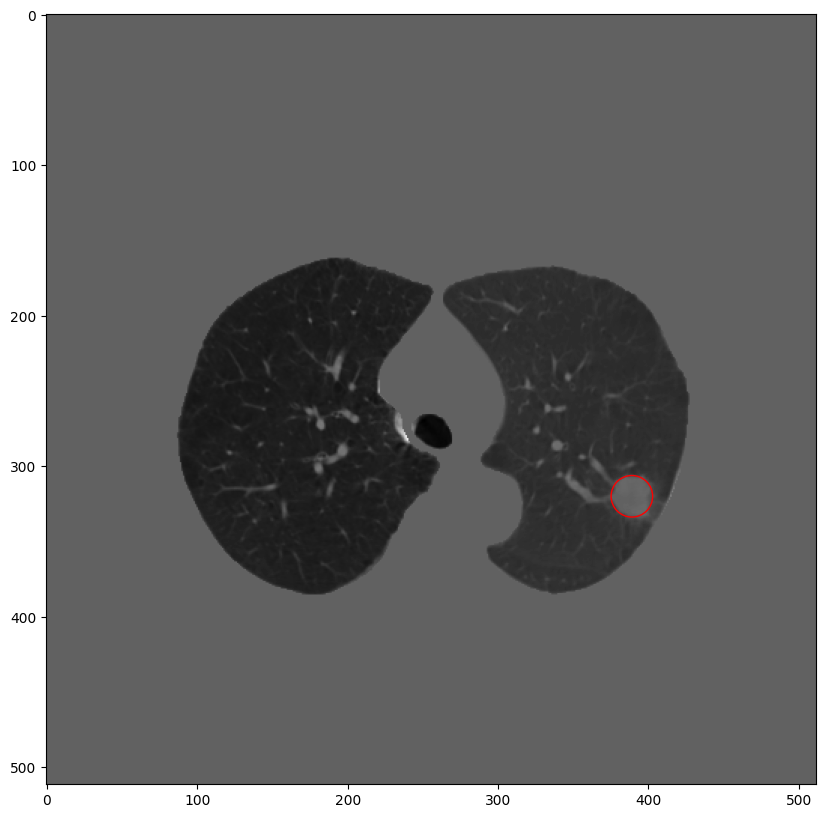

In [8]:
from skimage.draw import circle_perimeter

img = np.load("D:/fin_de_etude/data/dataset_2d/nodule/image87_nodule1.npy")
df = ad.read_csv("annotation_2.csv")
file = df[df["seriesuid"]=="image87_nodule1"]
x,y,d = float(file["coordX"]),float(file["coordY"]), float(file["diameter_mm"])
print(d)

plt.figure(figsize=(10,10))
plt.imshow(img,cmap="gray")
circle = plt.Circle((int(x),int(y)) , radius=(d/2), color='red', fill=False)
plt.gcf().gca().add_artist(circle)
